# Transiting Exoplanets Workbook



In [1]:
!pip install lightkurve

     |████████████████████████████████| 11.6 MB 11.2 MB/s eta 0:00:01


In [2]:
import lightkurve as lk
import matplotlib.pylab as plt
!matplotlib inline

/bin/bash: matplotlib: command not found


In [113]:
search_result = lk.search_lightcurve('Kepler-10', mission='Kepler', exptime=60)#, author="TESS-SPOC")
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 02,2009,Kepler,60,kplr011904151,0.0
1,Kepler Quarter 03,2009,Kepler,60,kplr011904151,0.0
2,Kepler Quarter 03,2009,Kepler,60,kplr011904151,0.0
3,Kepler Quarter 03,2009,Kepler,60,kplr011904151,0.0
4,Kepler Quarter 04,2010,Kepler,60,kplr011904151,0.0
5,Kepler Quarter 05,2010,Kepler,60,kplr011904151,0.0
6,Kepler Quarter 05,2010,Kepler,60,kplr011904151,0.0
7,Kepler Quarter 05,2010,Kepler,60,kplr011904151,0.0
8,Kepler Quarter 06,2010,Kepler,60,kplr011904151,0.0


In [114]:
lc_collection = search_result[:8].download_all()
lc_collection

LightCurveCollection of 8 objects:
    0: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=2 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    1: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    2: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    3: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    4: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=4 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    5: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    6: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    7: <KeplerLightCurve LABEL="KIC 11904151" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>

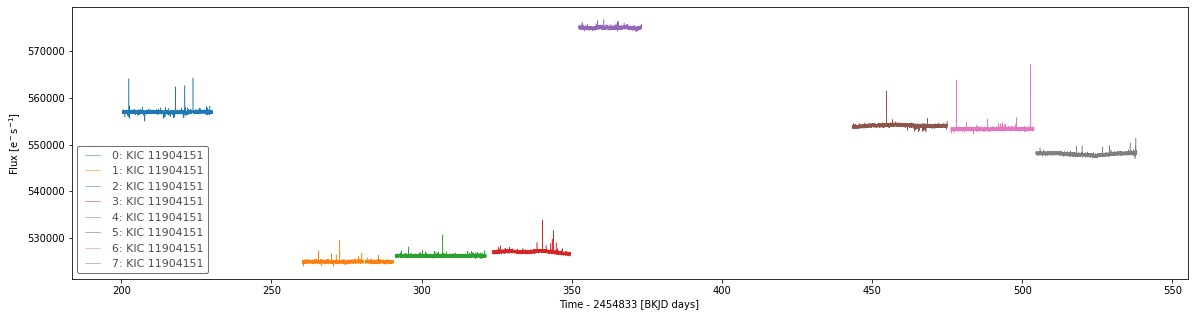

In [115]:
# Create a larger figure for clarity
fig, ax = plt.subplots(figsize=(20,5))
# Plot the light curve collection
lc_collection.plot(ax=ax);

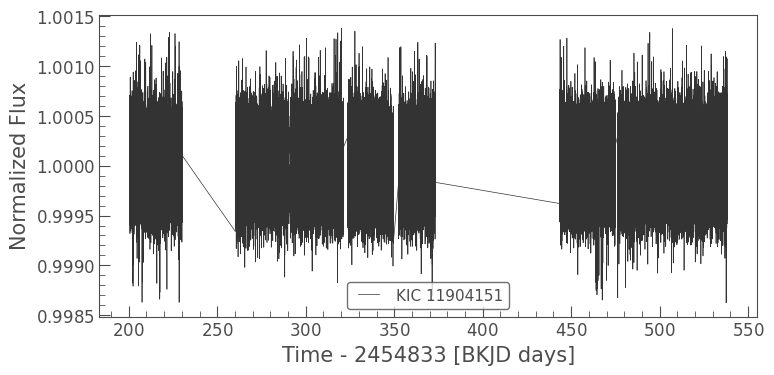

In [116]:
# Flatten the light curve
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers(sigma=6)

lc.plot();

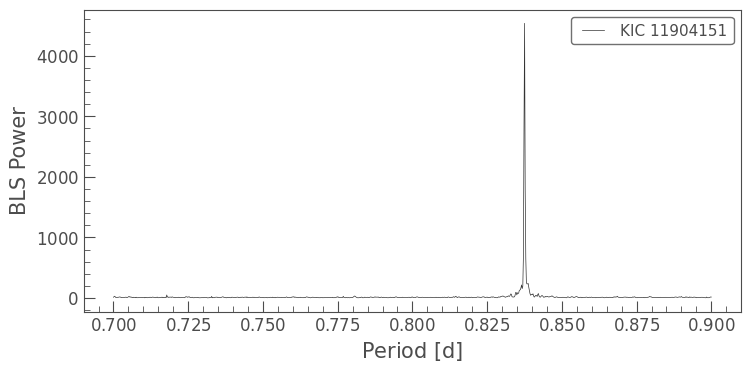

In [117]:
import numpy as np
# Create array of periods to search
period = np.linspace(0.7, 0.9, 1000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

In [59]:
# lc.interact_bls(minimum_period=1, maximum_period=20)



## If you don't see a peak in the periodogram above corresponding to your period, pick a different, easier planet to detect!!

0.8375375375375377 d 201.07908500967721 0.05 d


(-0.1, 0.1)

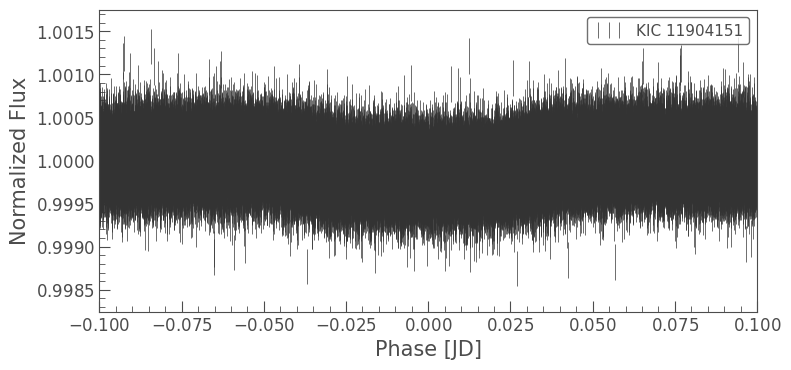

In [125]:
planet_period = bls.period_at_max_power
planet_t0 = bls.transit_time_at_max_power
planet_duration = bls.duration_at_max_power

print(planet_period, planet_t0, planet_duration)


folded_lc = lc.fold(period=planet_period, epoch_time=planet_t0)
folded_lc.errorbar();
plt.xlim([-0.1, 0.1])

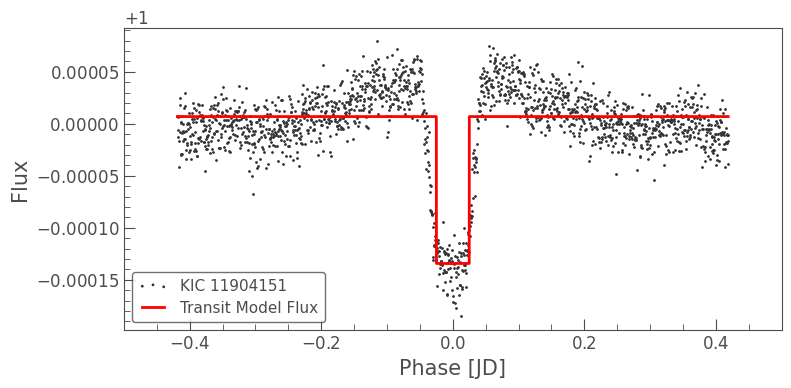

In [120]:
# Create a BLS model using the BLS parameters
planet_model = bls.get_transit_model(period=planet_period,
                                     transit_time=planet_t0,
                                     duration=planet_duration)

ax = lc.fold(planet_period, planet_t0).bin(.0005).scatter()
planet_model.fold(planet_period, planet_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-0.5, 0.5);




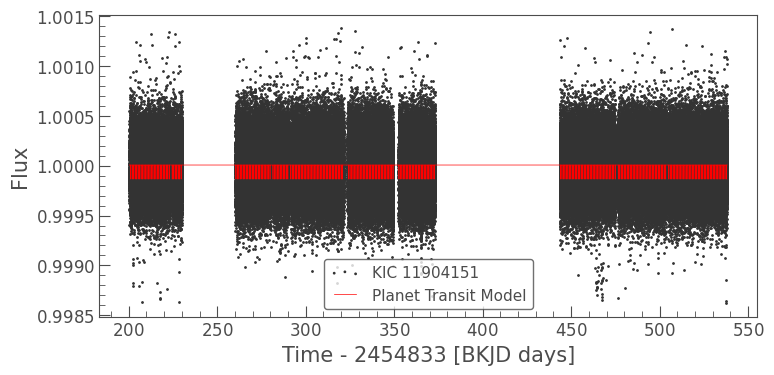

In [121]:
ax = lc.scatter();
planet_model.plot(ax=ax, c='r', label='Planet Transit Model');

In [122]:
transit_depth = (np.max(planet_model.flux) - np.min(planet_model.flux))
print(transit_depth)

0.00014119347942564975
